<a href="https://colab.research.google.com/github/shreyash-alt/MARS-RL-Assignment-2025/blob/main/FrozenLakeSARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Episode 100, Avg Reward (last 100): 0.02, Epsilon: 0.905
Episode 200, Avg Reward (last 100): 0.03, Epsilon: 0.819
Episode 300, Avg Reward (last 100): 0.08, Epsilon: 0.741
Episode 400, Avg Reward (last 100): 0.10, Epsilon: 0.670
Episode 500, Avg Reward (last 100): 0.15, Epsilon: 0.606
Episode 600, Avg Reward (last 100): 0.16, Epsilon: 0.549
Episode 700, Avg Reward (last 100): 0.21, Epsilon: 0.496
Episode 800, Avg Reward (last 100): 0.18, Epsilon: 0.449
Episode 900, Avg Reward (last 100): 0.38, Epsilon: 0.406
Episode 1000, Avg Reward (last 100): 0.38, Epsilon: 0.368
Episode 1100, Avg Reward (last 100): 0.36, Epsilon: 0.333
Episode 1200, Avg Reward (last 100): 0.52, Epsilon: 0.301
Episode 1300, Avg Reward (last 100): 0.47, Epsilon: 0.272
Episode 1400, Avg Reward (last 100): 0.72, Epsilon: 0.246
Episode 1500, Avg Reward (last 100): 0.64, Epsilon: 0.223
Episode 1600, Avg Reward (last 100): 0.67, Epsilon: 0.202
Episode 1700, Avg Reward (last 100): 0.66, Epsilon: 0.183
Episode 1800, Avg Rewar

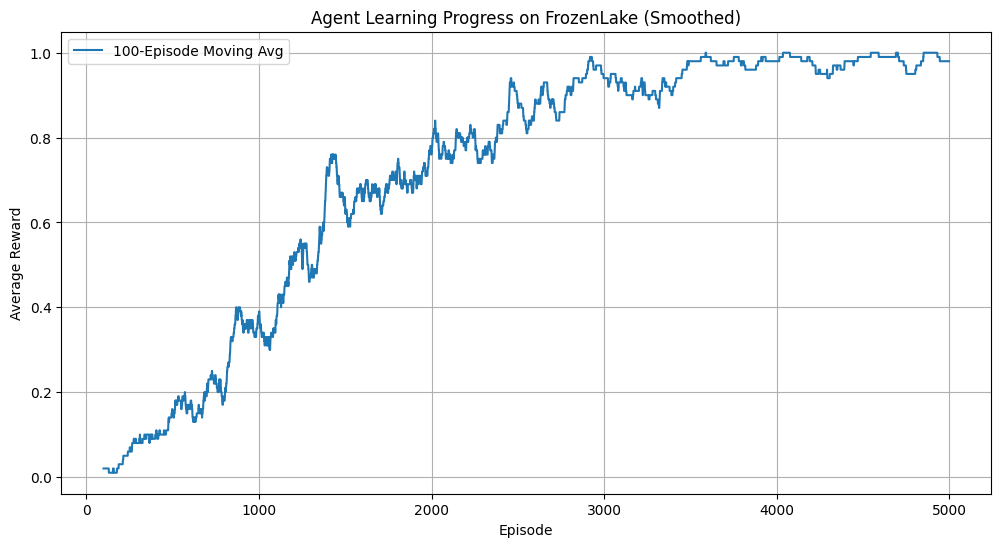


Final Trained Policy Execution:


 Reached the goal successfully!


In [6]:
import numpy as np
import pandas as pd
import gymnasium as gym
import matplotlib.pyplot as plt
from time import sleep

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
            return env.action_space.sample()#random action
    else:
            return np.argmax(Q[state])  # Greedy action

# Environment setup
env = gym.make("FrozenLake-v1", is_slippery=False)
n_states = env.observation_space.n
n_actions = env.action_space.n

# Q-table initialization
Q = np.zeros((n_states, n_actions))

# Hyperparameters
alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.999
epsilon_min = 0.01
episodes = 5000
max_steps = 100


# Track rewards
rewards_per_episode = []

# Q-learning training loop
for ep in range(episodes):
    state,_ = env.reset()

    total_reward = 0
    done = False

    for step in range(max_steps):
        action = epsilon_greedy_policy(Q, state, epsilon)

        result = env.step(action)
        new_state, reward, terminated, truncated, _ = result
        next_action = epsilon_greedy_policy(Q, new_state, epsilon)
        done = terminated or truncated


        # Q-learning update
        Q[state, action] += alpha * (reward + gamma * Q[new_state,next_action] - Q[state, action])#sarsa update
        state = new_state
        action = next_action
        total_reward += reward

        if done:
            break

    rewards_per_episode.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Progress report
    if (ep + 1) % 100 == 0:
        avg_reward = np.mean(rewards_per_episode[-100:])
        print(f"Episode {ep + 1}, Avg Reward (last 100): {avg_reward:.2f}, Epsilon: {epsilon:.3f}")

# Plot rewards
plt.figure(figsize=(12, 6))
rolling_avg = pd.Series(rewards_per_episode).rolling(100).mean()
plt.plot(rolling_avg, label='100-Episode Moving Avg')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Agent Learning Progress on FrozenLake (Smoothed)')
plt.grid(True)
plt.legend()
plt.show()

# Visualize the learned policy
print("\nFinal Trained Policy Execution:\n")
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human")
state,_ = env.reset()

done = False
sleep(1)
env.render()

while not done:
    action = np.argmax(Q[state])
    result = env.step(action)

    state, reward, terminated, truncated, _ = result
    done = terminated or truncated

    sleep(0.8)
    env.render()

if reward == 1:
    print("\n Reached the goal successfully!")
else:
    print("\n Fell into a hole or failed.")

env.close()

Episode 100, Avg Reward (last 100): 0.02, Epsilon: 0.905
Episode 200, Avg Reward (last 100): 0.02, Epsilon: 0.819
Episode 300, Avg Reward (last 100): 0.08, Epsilon: 0.741
Episode 400, Avg Reward (last 100): 0.13, Epsilon: 0.670
Episode 500, Avg Reward (last 100): 0.18, Epsilon: 0.606
Episode 600, Avg Reward (last 100): 0.32, Epsilon: 0.549
Episode 700, Avg Reward (last 100): 0.39, Epsilon: 0.496
Episode 800, Avg Reward (last 100): 0.45, Epsilon: 0.449
Episode 900, Avg Reward (last 100): 0.52, Epsilon: 0.406
Episode 1000, Avg Reward (last 100): 0.59, Epsilon: 0.368
Episode 1100, Avg Reward (last 100): 0.56, Epsilon: 0.333
Episode 1200, Avg Reward (last 100): 0.67, Epsilon: 0.301
Episode 1300, Avg Reward (last 100): 0.60, Epsilon: 0.272
Episode 1400, Avg Reward (last 100): 0.67, Epsilon: 0.246
Episode 1500, Avg Reward (last 100): 0.80, Epsilon: 0.223
Episode 1600, Avg Reward (last 100): 0.77, Epsilon: 0.202
Episode 1700, Avg Reward (last 100): 0.70, Epsilon: 0.183
Episode 1800, Avg Rewar

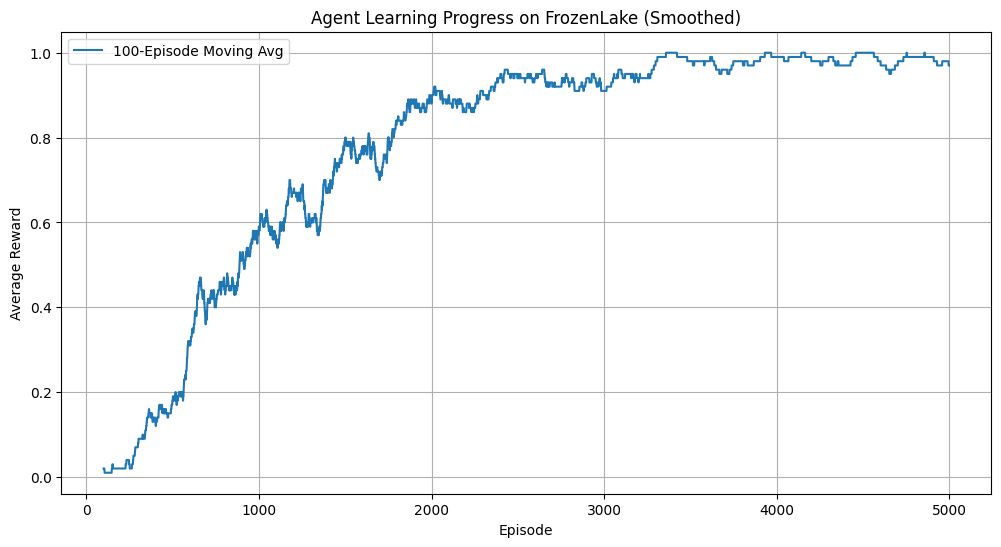


Final Trained Policy Execution:


 Reached the goal successfully!


In [2]:
import numpy as np
import pandas as pd
import gymnasium as gym
import matplotlib.pyplot as plt
from time import sleep

# Environment setup
env = gym.make("FrozenLake-v1", is_slippery=False)  # deterministic setup
n_states = env.observation_space.n
n_actions = env.action_space.n

# Q-table initialization
Q = np.zeros((n_states, n_actions))

# Hyperparameters
alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.999  # slower decay to allow more exploration
epsilon_min = 0.01
episodes = 5000
max_steps = 100


# Track rewards
rewards_per_episode = []

# Q-learning training loop
for ep in range(episodes):
    state,_ = env.reset()

    total_reward = 0
    done = False

    for step in range(max_steps):
        # Epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        result = env.step(action)
        new_state, reward, terminated, truncated, _ = result
        done = terminated or truncated


        # Q-learning update
        Q[state, action] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
        state = new_state
        total_reward += reward

        if done:
            break

    rewards_per_episode.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Progress report
    if (ep + 1) % 100 == 0:
        avg_reward = np.mean(rewards_per_episode[-100:])
        print(f"Episode {ep + 1}, Avg Reward (last 100): {avg_reward:.2f}, Epsilon: {epsilon:.3f}")

# Plot rewards
plt.figure(figsize=(12, 6))
rolling_avg = pd.Series(rewards_per_episode).rolling(100).mean()
plt.plot(rolling_avg, label='100-Episode Moving Avg')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Agent Learning Progress on FrozenLake (Smoothed)')
plt.grid(True)
plt.legend()
plt.show()

# Visualize the learned policy
print("\nFinal Trained Policy Execution:\n")
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human")
state,_ = env.reset()

done = False
sleep(1)
env.render()

while not done:
    action = np.argmax(Q[state])
    result = env.step(action)

    state, reward, terminated, truncated, _ = result
    done = terminated or truncated

    sleep(0.8)
    env.render()

if reward == 1:
    print("\n Reached the goal successfully!")
else:
    print("\n Fell into a hole or failed.")

env.close()